
# **Mini Project: Cloud Hosted Projects**
This notebook ingests a datafile containing data from the 2024 Summery Olympics (sourced from Kaggle) and does the following

Reads the file

- Displays the head data of the file
- Describes the file (Summary statistics)
- Plots two graphs
- Bar graph detailing the number of total medals won per country
- Line chart detailing the total medals won per day for each day of the athletics


## ***Import Modules***

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## ***Building lib.py***

In [2]:
path = "https://raw.githubusercontent.com/nogibjj/ag825_individual_project_1/refs/heads/main/medallists.csv?token=GHSAT0AAAAAACV7IGYDWIOQDXVGJOIM2ZJGZZFAVJQ"
headdata = pd.DataFrame()
summary = pd.DataFrame()

In [3]:
def read_data(path):
    df = pd.read_csv(path)
    return df

## ***Building main.py***

In [4]:
def aboutdata(df):
    headdata = df.head()
    summary = df.describe()
    print(headdata)
    print(summary)

In [5]:
# To create plots
def createplots(df):
    # PLOT 1
    country_medals = df.groupby("country").size()

    country_medals = country_medals[country_medals > 0]

    plt.figure(figsize=(20, 6))
    plt.bar(country_medals.index, country_medals, color="blue")

    plt.xlabel("Country")
    plt.ylabel("Total Number of Medals Won")
    plt.title("Medals won per country")

    plt.grid(True)
    plt.minorticks_on()
    plt.grid(which="major", linestyle="-", linewidth=0.4)
    plt.grid(which="minor", linestyle=":", linewidth=0.4)

    plt.xticks(rotation=90)

    plt.savefig("medals_per_country.png")

    # PLOT 2
    medal_counts = df.groupby("medal_date").size()

    plt.figure(figsize=(20, 6))
    medal_counts.plot()
    medal_counts.plot(marker="o")
    plt.xlabel("Date")
    plt.ylabel("Total Number of Medals Won")
    plt.title("Number of Medals Won Over Time")
    plt.grid(True)

    plt.minorticks_on()
    plt.grid(which="major", linestyle="-", linewidth=0.7)
    plt.grid(which="minor", linestyle=":", linewidth=0.7)

    plt.savefig("medals_over_time.png")

In [ ]:
# To write to markdown file
def createsummary():
    with open("summary_report.md", "w", encoding="utf-8") as file:
        file.write("""# Mini Project: Pandas Descriptive Statistics\n\n""")
        file.write("""Adil Keku Gazder <br>""")
        file.write(""" ag825, adil.gazder@duke.edu <br>""")
        file.write("""IDS 706: Data Engineering Systems <br>""")
        file.write("""Duke University, Fall 2024\n\n""")
        file.write(
            """The aim with this project was to read a .csv file and 
            generate summary statistics and plots describing the data. 
            The dataset used for this project was acquired from Kaggle 
            (Olympic Summer Games - Paris 2024 -> medallists.csv) <br>"""
        )
        file.write(
            """\n\nLink to the dataset: 
            (https://www.kaggle.com/datasets/muhammadehsan02/
            olympic-summer-games-paris-2024?select=medallists.csv)\n\n"""
        )
        file.write("## Head of dataset used:\n")
        file.write(headdata.to_markdown())
        file.write("\n\n## Summary Statistics:\n")
        file.write(summary.to_markdown())
        file.write(
            """\n\n## Distribution of total medals achieved totally 
            over each day of the olympics\n"""
        )
        file.write("![Data Visualization](medals_over_time.png)")
        file.write("\n\n## Distribution of total medals achieved per each country\n")
        file.write("![Data Visualization](medals_per_country.png)")

   medal_date    medal_type  medal_code             name  gender country_code  \
0  2024-07-27    Gold Medal         1.0  EVENEPOEL Remco    Male          BEL   
1  2024-07-27  Silver Medal         2.0    GANNA Filippo    Male          ITA   
2  2024-07-27  Bronze Medal         3.0    van AERT Wout    Male          BEL   
3  2024-07-27    Gold Medal         1.0      BROWN Grace  Female          AUS   
4  2024-07-27  Silver Medal         2.0   HENDERSON Anna  Female          GBR   

         country   country_long    nationality team team_gender    discipline  \
0        Belgium        Belgium        Belgium  NaN         NaN  Cycling Road   
1          Italy          Italy          Italy  NaN         NaN  Cycling Road   
2        Belgium        Belgium        Belgium  NaN         NaN  Cycling Road   
3      Australia      Australia      Australia  NaN         NaN  Cycling Road   
4  Great Britain  Great Britain  Great Britain  NaN         NaN  Cycling Road   

                          

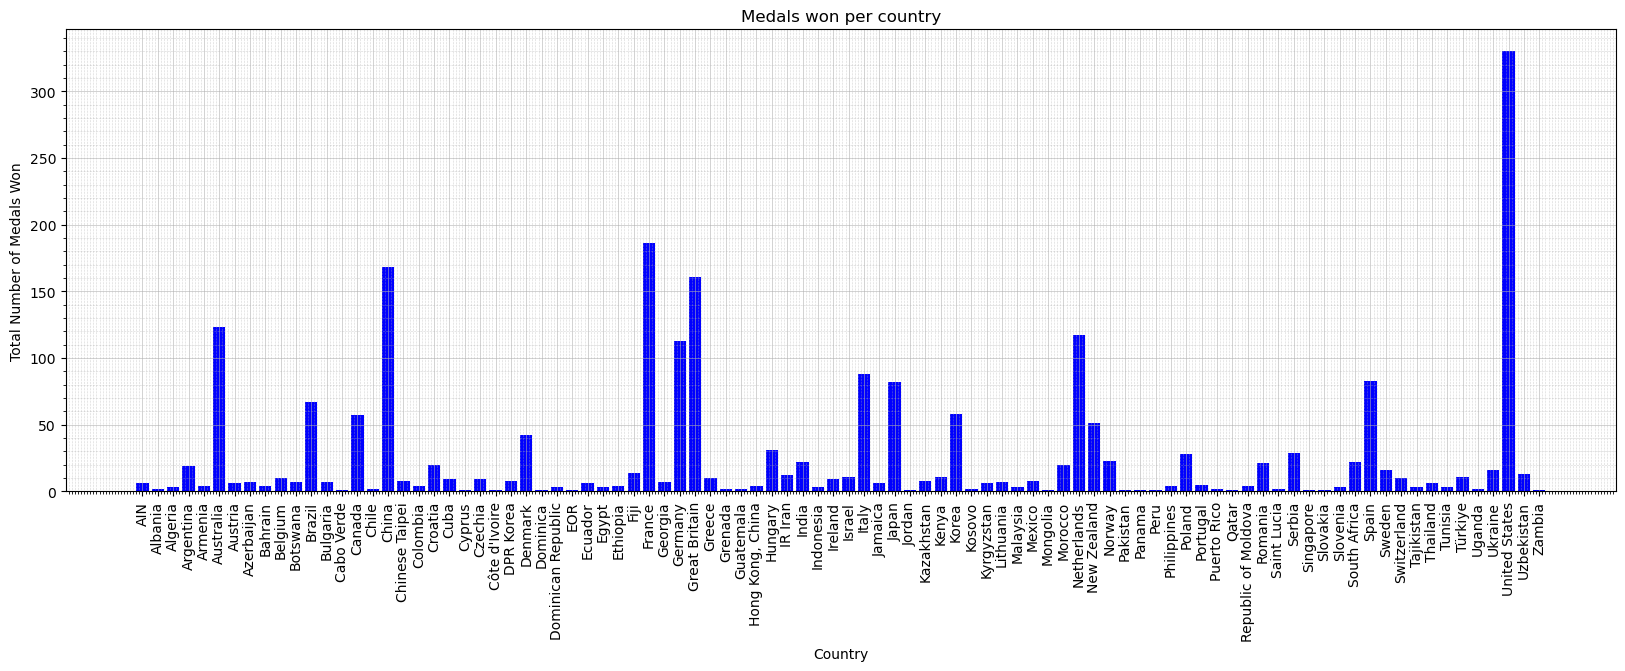

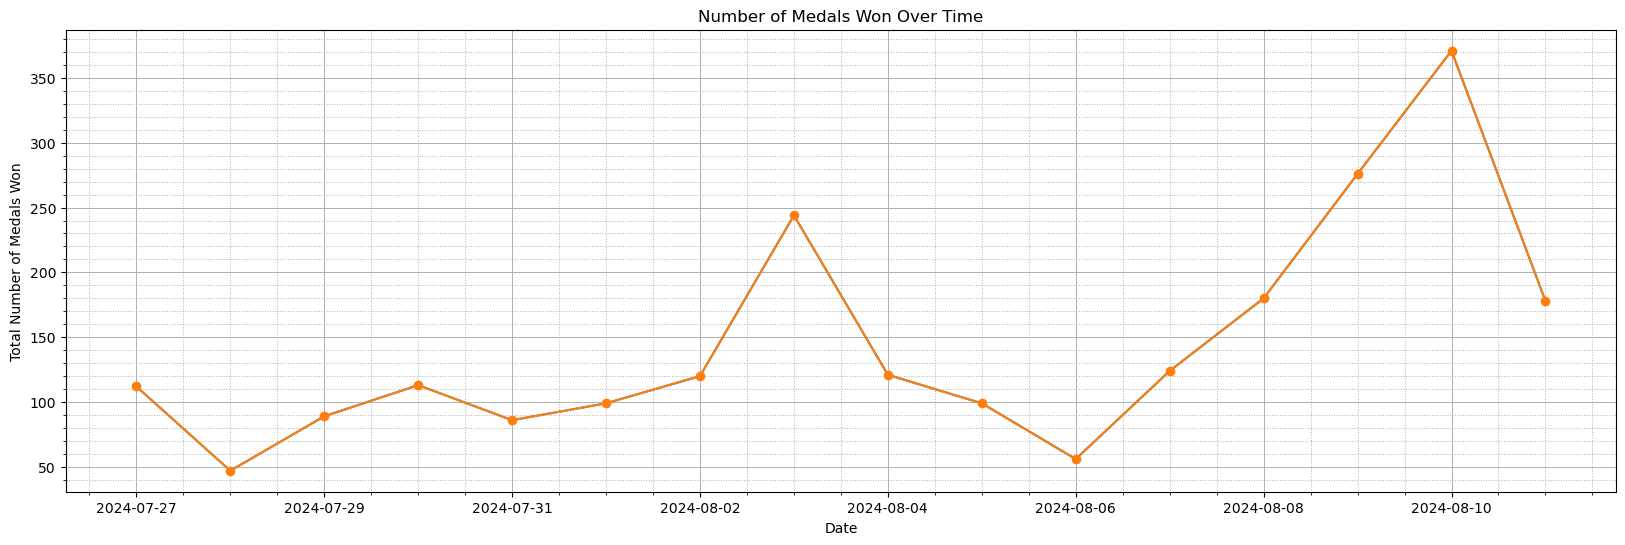

In [7]:
if __name__ == "__main__":
    alldata = read_data(path)
    aboutdata(alldata)
    createplots(alldata)
    createsummary()

In [ ]:
path = "medallists.csv"
df = pd.read_csv(path)


def test_aboutdata():
    assert (aboutdata(df)) is not None


def test_createplots():
    assert (createplots(df)) is not None


def test_createsummary():
    assert (createsummary()) is not None